In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import os
import warnings


In [59]:
for dirname, _, filenames in os.walk('/home/daftvm/workspace/mast1_ai/ydays/medical_cost_personal/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore')


def analysis(data):
    return pd.DataFrame({"Data Type": data.dtypes, "Unique Count": data.apply(lambda x: x.nunique(), axis=0),
                         "Null Count": data.isnull().sum()})

def barplot(x, y, data):
    plt.figure(figsize=(20, 60))

    for i in enumerate(x):
        plt.subplot(12, 2, i[0]+1)
        sb.barplot(x=x[i[1]], y=y, data=data)
        plt.xlabel(i[1])

def regplot(x, y, data):
    plt.figure(figsize=(20, 60))

    for i in enumerate(x):
        plt.subplot(12, 2, i[0]+1)
        sb.regplot(x=x[i[1]], y=y, data=data)
        plt.xlabel(i[1])

/home/daftvm/workspace/mast1_ai/ydays/medical_cost_personal/insurance.csv
/home/daftvm/workspace/mast1_ai/ydays/medical_cost_personal/conda_dependencies.yml
/home/daftvm/workspace/mast1_ai/ydays/medical_cost_personal/medical_cost.ipynb


In [42]:
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
df.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
df.sex.replace(('female', 'male'), (1, 0), inplace=True)
df.region.replace(('northeast', 'southeast', 'southwest',
                  'northwest'), (0, 1, 2, 3), inplace=True)


In [44]:
df_copy = df.copy()

In [45]:
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


In [46]:
analysis(df)


,Data Type,Unique Count,Null Count
age,int64,47,0
sex,int64,2,0
bmi,float64,548,0
children,int64,6,0
smoker,int64,2,0
region,int64,4,0
charges,float64,1337,0


In [53]:
df_columns = df.drop(['smoker', 'charges', 'bmi'], axis=1)
df_y = df['smoker']


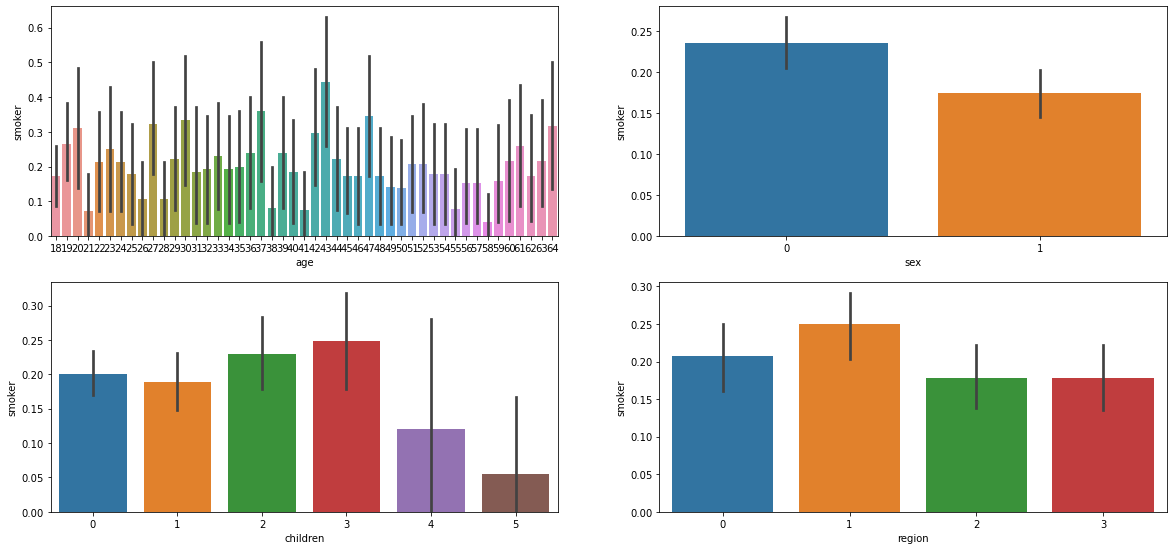

In [62]:
barplot(df_columns, df_y, df)


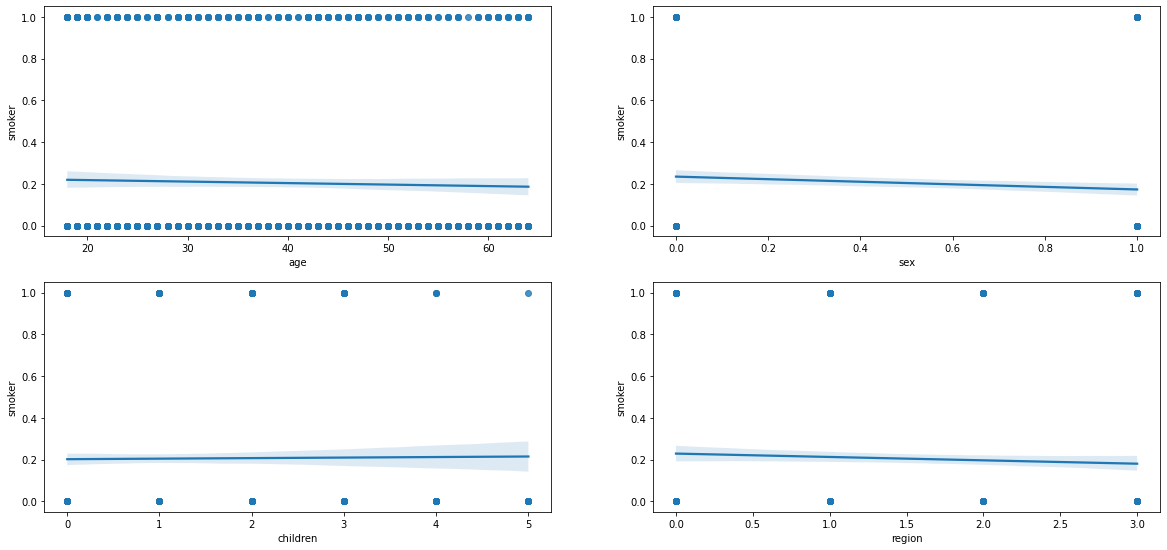

In [61]:
regplot(df_columns, df_y, df)
